# **Abdallah Sadeq Obaid**

### Install Packages

In [ ]:
!pip install gensim


In [ ]:
pip install tensorflow


### Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import re
import re
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
#from num2words import num2words
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from nltk.stem import WordNetLemmatizer
from nltk.stem.isri import ISRIStemmer
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

nltk.download('punkt')
nltk.download('stopwords')
le = LabelEncoder()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading Data

In [ ]:
df = pd.read_csv('bbc_news_text_complexity_summarization.csv')
df.head()

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...


### Exploring & Analyzing Data

In [ ]:
print(df[['no_sentences', 'Flesch Reading Ease Score', 'Dale-Chall Readability Score']].dtypes)
print(df.info())

no_sentences                      int64
Flesch Reading Ease Score       float64
Dale-Chall Readability Score    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   text                          2127 non-null   object 
 1   labels                        2127 non-null   object 
 2   no_sentences                  2127 non-null   int64  
 3   Flesch Reading Ease Score     2127 non-null   float64
 4   Dale-Chall Readability Score  2127 non-null   float64
 5   text_rank_summary             2127 non-null   object 
 6   lsa_summary                   2127 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 116.4+ KB
None


<Axes: xlabel='labels', ylabel='count'>

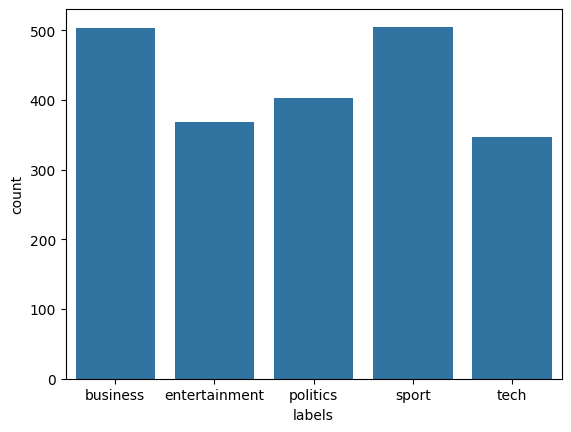

In [ ]:
sns.countplot(x= 'labels', data = df)

In [ ]:
df[['no_sentences', 'Flesch Reading Ease Score', 'Dale-Chall Readability Score']].corr()

,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score
no_sentences,1.000000,0.086457,-0.348049
Flesch Reading Ease Score,0.086457,1.000000,-0.452389
Dale-Chall Readability Score,-0.348049,-0.452389,1.000000


In [ ]:
labeld = df.groupby('labels')[['no_sentences','Dale-Chall Readability Score', 'Flesch Reading Ease Score']].sum()
labeld

,no_sentences,Dale-Chall Readability Score,Flesch Reading Ease Score
labels,,,
business,8907,4818.11,30819.52
entertainment,6117,3476.59,24034.07
politics,8046,3609.90,24328.57
sport,8644,4438.95,35269.76
tech,8631,3109.10,20922.16


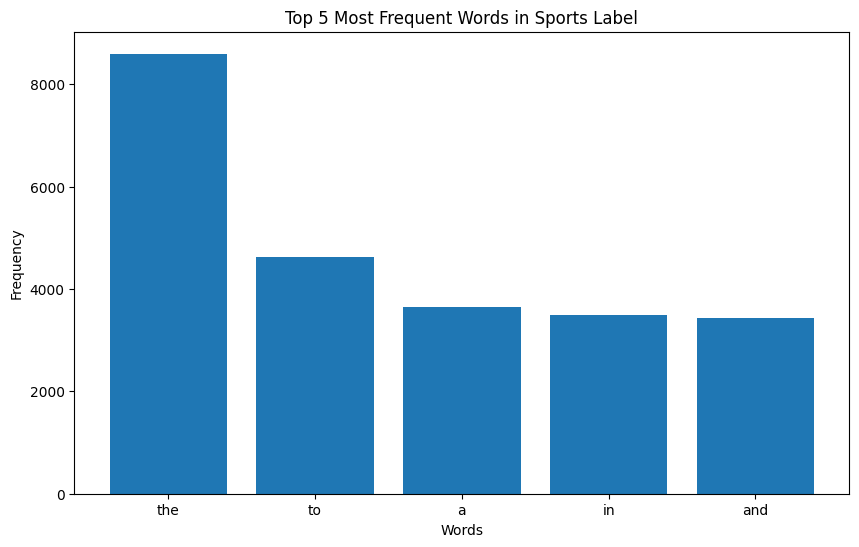

In [ ]:
sport_data = df[df['labels'] == 'sport']
all_sport_text = " ".join(sport_data['text'].dropna())
word_counts = Counter(all_sport_text.split())
top_5_words = word_counts.most_common(5)
words, counts = zip(*top_5_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 5 Most Frequent Words in Sports Label')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

#### no_sentenecs

In [ ]:
columns = ['no_sentences']
for label in df['labels'].unique():
    label_data = df[df['labels'] == label]
    print(f"Label: {label}")

    for col in columns:
        print(f"Minimum Value of {col}: {label_data[col].min()}")
        print(f"Maximum Value of {col}: {label_data[col].max()}")

    print("---------------------------")

Label: business
Minimum Value of no_sentences: 6
Maximum Value of no_sentences: 48
---------------------------
Label: entertainment
Minimum Value of no_sentences: 7
Maximum Value of no_sentences: 235
---------------------------
Label: politics
Minimum Value of no_sentences: 4
Maximum Value of no_sentences: 252
---------------------------
Label: sport
Minimum Value of no_sentences: 5
Maximum Value of no_sentences: 81
---------------------------
Label: tech
Minimum Value of no_sentences: 7
Maximum Value of no_sentences: 149
---------------------------


#### Flesch Reading Ease Score

<Axes: xlabel='Flesch Reading Ease Score', ylabel='Count'>

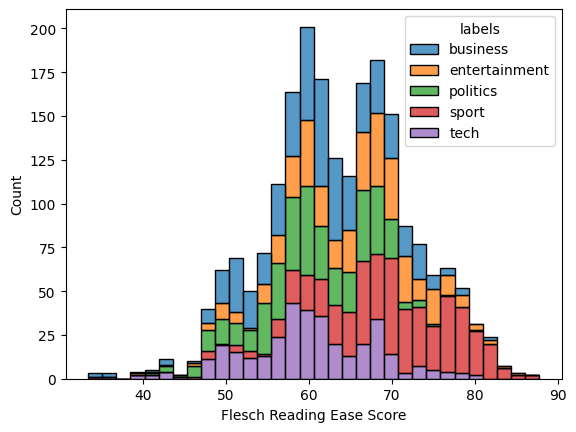

In [ ]:
sns.histplot(x = 'Flesch Reading Ease Score' , hue = 'labels', multiple='stack' ,data = df)

In [ ]:
columns = ['Flesch Reading Ease Score']
for label in df['labels'].unique():
    label_data = df[df['labels'] == label]
    print(f"Label: {label}")

    for col in columns:
        print(f"Minimum Value of {col}: {label_data[col].min()}")
        print(f"Maximum Value of {col}: {label_data[col].max()}")

    print("---------------------------")

Label: business
Minimum Value of Flesch Reading Ease Score: 34.36
Maximum Value of Flesch Reading Ease Score: 82.14
---------------------------
Label: entertainment
Minimum Value of Flesch Reading Ease Score: 39.47
Maximum Value of Flesch Reading Ease Score: 85.42
---------------------------
Label: politics
Minimum Value of Flesch Reading Ease Score: 40.99
Maximum Value of Flesch Reading Ease Score: 80.11
---------------------------
Label: sport
Minimum Value of Flesch Reading Ease Score: 33.41
Maximum Value of Flesch Reading Ease Score: 87.76
---------------------------
Label: tech
Minimum Value of Flesch Reading Ease Score: 35.2
Maximum Value of Flesch Reading Ease Score: 80.41
---------------------------


#### Dale-Chall Readability Score

<Axes: xlabel='Dale-Chall Readability Score', ylabel='Count'>

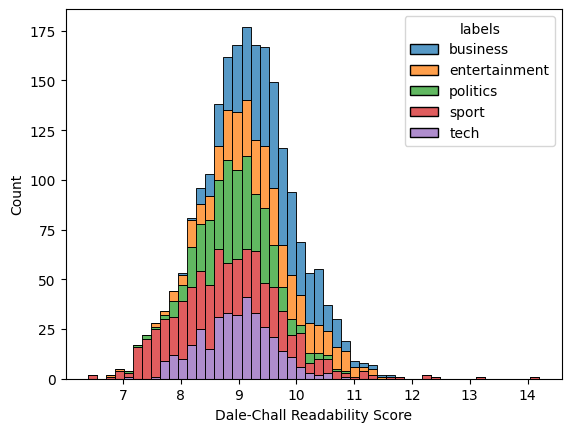

In [ ]:
sns.histplot(x = 'Dale-Chall Readability Score' , hue = 'labels', multiple='stack' ,data = df)

In [ ]:
columns = ['Dale-Chall Readability Score']
for label in df['labels'].unique():
    label_data = df[df['labels'] == label]
    print(f"Label: {label}")

    for col in columns:
        print(f"Minimum Value of {col}: {label_data[col].min()}")
        print(f"Maximum Value of {col}: {label_data[col].max()}")

    print("---------------------------")

Label: business
Minimum Value of Dale-Chall Readability Score: 7.98
Maximum Value of Dale-Chall Readability Score: 11.68
---------------------------
Label: entertainment
Minimum Value of Dale-Chall Readability Score: 6.85
Maximum Value of Dale-Chall Readability Score: 11.46
---------------------------
Label: politics
Minimum Value of Dale-Chall Readability Score: 7.14
Maximum Value of Dale-Chall Readability Score: 10.78
---------------------------
Label: sport
Minimum Value of Dale-Chall Readability Score: 6.4
Maximum Value of Dale-Chall Readability Score: 14.2
---------------------------
Label: tech
Minimum Value of Dale-Chall Readability Score: 7.15
Maximum Value of Dale-Chall Readability Score: 10.9
---------------------------


#### TEST THEORY

In [ ]:
filtered_data = df[
    (df['no_sentences'] <= 81) &
    (df['Dale-Chall Readability Score'] > 12)
]
filtered_data

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
1486,Mansfield 0-1 Leyton Orient\n\nAn second-half ...,sport,9,74.19,12.23,An second-half goal from Andy Scott condemned ...,"As Orient chased a second, Mansfield had to cl..."
1497,Hereford 1-1 Doncaster\n\nHereford win 3-1 on ...,sport,10,75.91,12.46,Rovers took the lead on 59 minutes as Michael ...,Danny Williams equalised for the hosts after 7...
1565,Murray returns to Scotland fold\n\nEuan Murray...,sport,5,33.41,12.30,"""I'm just happy to be back playing and be invo...",Euan Murray has been named in the Scotland tra...
1594,Leeds v Saracens (Fri)\n\nHeadingley\n\nFriday...,sport,7,63.19,13.19,The Tykes have brought in Newcastle prop Ed Ka...,Raphael Ibanez is named at hooker for Saracens...
1595,"Worcester v Sale (Fri)\n\nSixways\n\nFriday, 2...",sport,7,63.29,14.20,"Friday, 25 February They make just one change,...","They make just one change, with Tim Collier re..."


### Preprocessing

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import words as nltk_words
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    english_words = set(nltk_words.words())
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    processed_text = ' '.join(lemmatized_tokens).strip()
    return processed_text

In [ ]:
preprocessed_documents = [preprocess_text(doc) for doc in df['text']]
preprocessed_documents

['ad sale boost time warner profit quarterly profit u medium giant timewarner jumped three month december firm one biggest investor google benefited sale internet connection higher advert sale timewarner said fourth quarter sale rose profit buoyed gain offset profit dip warner bros less user aol time warner said friday owns google internet business aol mixed fortune lost subscriber fourth quarter profit lower preceding three quarter however company said aol underlying profit exceptional item rose back stronger internet advertising revenue hope increase subscriber offering online service free timewarner internet customer try sign aol existing customer broadband timewarner also restate result following probe u security exchange commission sec close concluding time warner fourth quarter profit slightly better analyst expectation film division saw profit slump helped flop alexander catwoman sharp contrast third final film lord ring trilogy boosted result timewarner posted profit performanc

In [ ]:
df['Preprocessed'] = df['text'].apply(preprocess_text)

In [ ]:
df

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary,Preprocessed
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...,ad sale boost time warner profit quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san...",dollar gain greenspan speech dollar hit highes...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...,yukos unit buyer face loan claim owner embattl...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ...",high fuel price hit ba profit british airway b...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...,pernod takeover talk lift domecq share uk drin...
...,...,...,...,...,...,...,...,...
2122,New consoles promise big problems\n\nMaking ga...,tech,52,60.85,9.20,Instead of employing lots of artists to create...,Mr Wright said that enabling players to devise...,new console promise big problem making game fu...
2123,BT program to beat dialler scams\n\nBT is intr...,tech,17,56.29,9.23,If a bill rises substantially above its usual ...,BT is introducing two initiatives to help beat...,bt program beat dialler scam bt introducing tw...
2124,Be careful how you code\n\nA new European dire...,tech,45,56.29,8.73,"If it gets its way, the Dutch government will ...",A new European directive could put software wr...,careful code new european directive could put ...
2125,US cyber security chief resigns\n\nThe man mak...,tech,16,47.42,9.14,Amit Yoran was director of the National Cyber ...,The man making sure US computer networks are s...,u cyber security chief resigns man making sure...


In [ ]:
df.to_csv('NEW_bbc_news_text_complexity_summarization.csv', index=False, encoding='utf-8')

NameError: name 'df' is not defined

In [ ]:
df.iloc[0]['text']

'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

In [ ]:
df.iloc[0]['Preprocessed']

'ad sale boost time warner profit quarterly profit u medium giant timewarner jumped three month december firm one biggest investor google benefited sale internet connection higher advert sale timewarner said fourth quarter sale rose profit buoyed gain offset profit dip warner bros less user aol time warner said friday owns google internet business aol mixed fortune lost subscriber fourth quarter profit lower preceding three quarter however company said aol underlying profit exceptional item rose back stronger internet advertising revenue hope increase subscriber offering online service free timewarner internet customer try sign aol existing customer broadband timewarner also restate result following probe u security exchange commission sec close concluding time warner fourth quarter profit slightly better analyst expectation film division saw profit slump helped flop alexander catwoman sharp contrast third final film lord ring trilogy boosted result timewarner posted profit performance

In [ ]:
df = pd.read_csv('NEW_bbc_news_text_complexity_summarization.csv')

In [ ]:
df

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary,Preprocessed
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...,ad sale boost time warner profit quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san...",dollar gain greenspan speech dollar hit highes...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...,yukos unit buyer face loan claim owner embattl...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ...",high fuel price hit ba profit british airway b...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...,pernod takeover talk lift domecq share uk drin...
...,...,...,...,...,...,...,...,...
2122,New consoles promise big problems\n\nMaking ga...,tech,52,60.85,9.20,Instead of employing lots of artists to create...,Mr Wright said that enabling players to devise...,new console promise big problem making game fu...
2123,BT program to beat dialler scams\n\nBT is intr...,tech,17,56.29,9.23,If a bill rises substantially above its usual ...,BT is introducing two initiatives to help beat...,bt program beat dialler scam bt introducing tw...
2124,Be careful how you code\n\nA new European dire...,tech,45,56.29,8.73,"If it gets its way, the Dutch government will ...",A new European directive could put software wr...,careful code new european directive could put ...
2125,US cyber security chief resigns\n\nThe man mak...,tech,16,47.42,9.14,Amit Yoran was director of the National Cyber ...,The man making sure US computer networks are s...,u cyber security chief resigns man making sure...


In [ ]:
df['labels'].value_counts()

,count
labels,
sport,505
business,503
politics,403
entertainment,369
tech,347


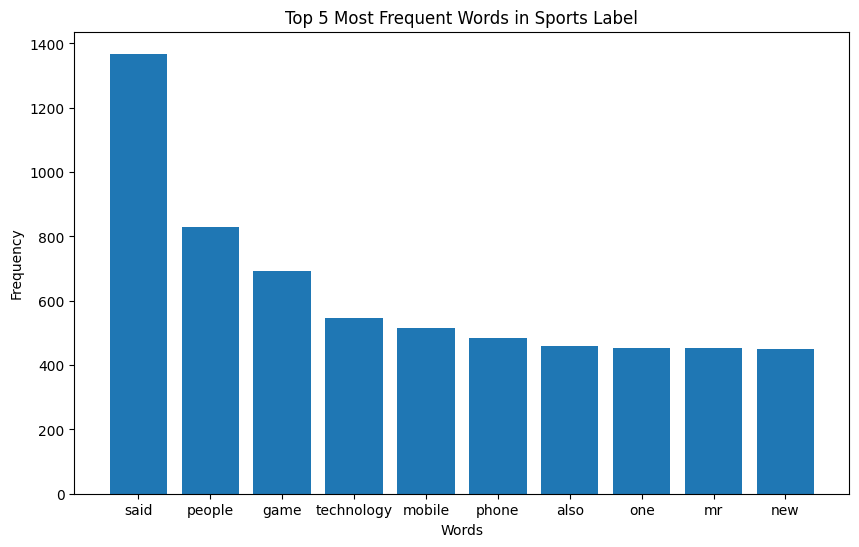

In [ ]:
sport_df = df[df['labels'] == 'tech']
all_sport_text = " ".join(sport_df['Preprocessed'].dropna())
word_counts = Counter(all_sport_text.split())
top_5_words = word_counts.most_common(10)
words, counts = zip(*top_5_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 5 Most Frequent Words in Sports Label')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


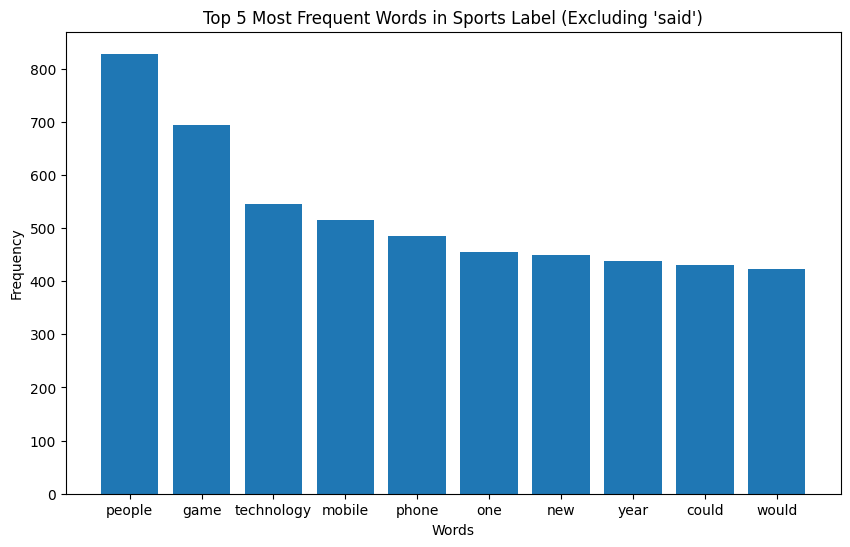

In [ ]:
filtered_sport_text = " ".join(word for word in all_sport_text.split() if word != 'said' and word != 'mr' and word != 'also' )
filtered_word_counts = Counter(filtered_sport_text.split())
filtered_top_5_words = filtered_word_counts.most_common(10)
filtered_words, filtered_counts = zip(*filtered_top_5_words)

plt.figure(figsize=(10, 6))
plt.bar(filtered_words, filtered_counts)
plt.title("Top 5 Most Frequent Words in Sports Label (Excluding 'said')")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


### Modeling

#### TF-IDF

In [ ]:
df = pd.read_csv('NEW_bbc_news_text_complexity_summarization.csv')

In [ ]:
df.head()

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary,Preprocessed
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...,ad sale boost time warner profit quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san...",dollar gain greenspan speech dollar hit highes...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...,yukos unit buyer face loan claim owner embattl...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ...",high fuel price hit ba profit british airway b...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...,pernod takeover talk lift domecq share uk drin...


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed'], df['labels'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=22137)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
tfidf_train_feature = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_test_feature = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names_out())


In [ ]:
tfidf_train_feature.head()

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aara,aarhus,aaron,...,zone,zonealarm,zoom,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
logistic_regressor = LogisticRegression(random_state=0)
logistic_regressor.fit(tfidf_train_feature, y_train)


LogisticRegression(random_state=0)

In [ ]:
y_pred = logistic_regressor.predict(tfidf_train_feature)


In [ ]:
y_train_pred = logistic_regressor.predict(tfidf_train_feature)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 1.00


In [ ]:
logistic_regressor = LogisticRegression(random_state=0)
logistic_regressor.fit(tfidf_train_feature, y_train)

y_train_pred = logistic_regressor.predict(tfidf_train_feature)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

y_pred = logistic_regressor.predict(tfidf_test_feature)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))


Training Classification Report:
               precision    recall  f1-score   support

     business       1.00      0.99      1.00       399
entertainment       1.00      1.00      1.00       291
     politics       0.99      0.99      0.99       330
        sport       1.00      1.00      1.00       407
         tech       0.99      1.00      0.99       274

     accuracy                           1.00      1701
    macro avg       1.00      1.00      1.00      1701
 weighted avg       1.00      1.00      1.00      1701

Test Classification Report:
               precision    recall  f1-score   support

     business       0.99      0.98      0.99       104
entertainment       0.99      0.97      0.98        78
     politics       0.97      1.00      0.99        73
        sport       1.00      1.00      1.00        98
         tech       0.97      0.97      0.97        73

     accuracy                           0.99       426
    macro avg       0.98      0.99      0.99       426


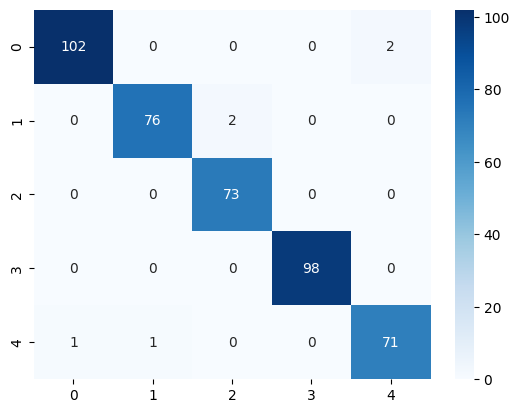

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_matrix.flatten()]
labels = np.asarray(group_counts).reshape(5, 5)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');


##### cross-validation

StratifiedKFold(n_splits=5, random_state=1024, shuffle=True)

Fold: 1
	Train Accuracy: 1.00
	Test Accuracy: 0.96
	Precision: 0.96
	Recall: 0.96
	F1-score: 0.96


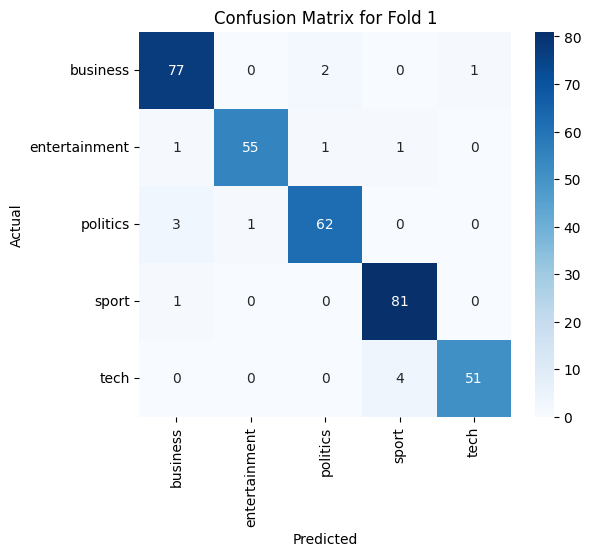

	Train Accuracy: 1.00
	Test Accuracy: 0.96
	Precision: 0.96
	Recall: 0.96
	F1-score: 0.96

Fold: 2
	Train Accuracy: 1.00
	Test Accuracy: 0.96
	Precision: 0.96
	Recall: 0.96
	F1-score: 0.96


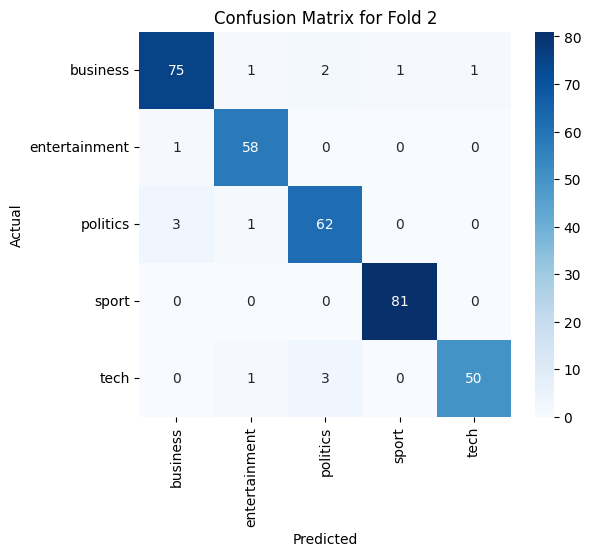

	Train Accuracy: 1.00
	Test Accuracy: 0.96
	Precision: 0.96
	Recall: 0.96
	F1-score: 0.96

Fold: 3
	Train Accuracy: 1.00
	Test Accuracy: 0.98
	Precision: 0.98
	Recall: 0.98
	F1-score: 0.98


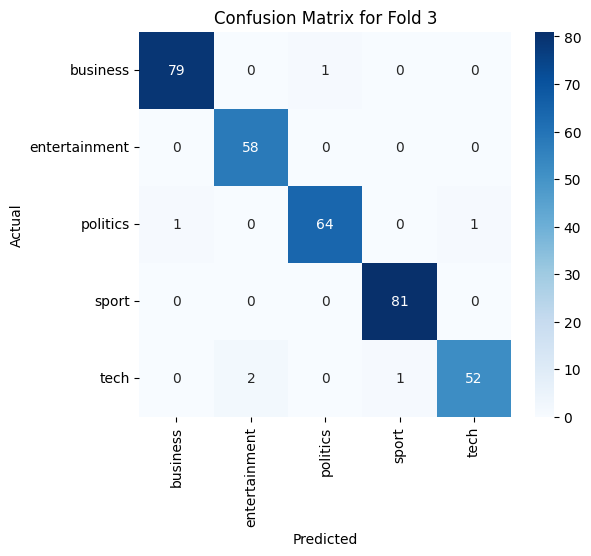

	Train Accuracy: 1.00
	Test Accuracy: 0.98
	Precision: 0.98
	Recall: 0.98
	F1-score: 0.98

Fold: 4
	Train Accuracy: 1.00
	Test Accuracy: 0.96
	Precision: 0.96
	Recall: 0.96
	F1-score: 0.96


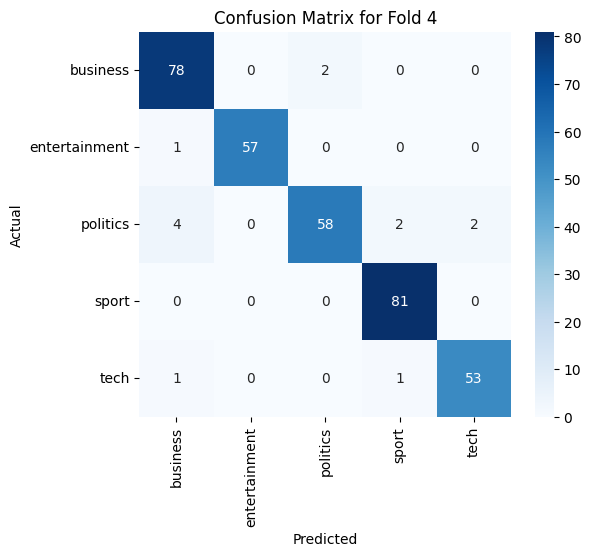

	Train Accuracy: 1.00
	Test Accuracy: 0.96
	Precision: 0.96
	Recall: 0.96
	F1-score: 0.96

Fold: 5
	Train Accuracy: 1.00
	Test Accuracy: 0.96
	Precision: 0.97
	Recall: 0.96
	F1-score: 0.96


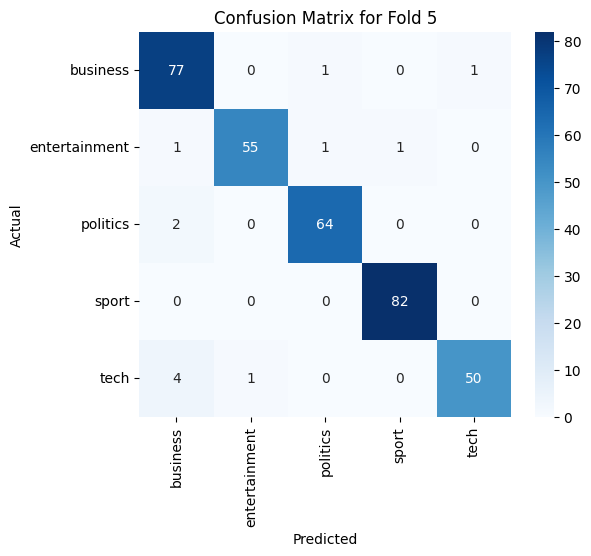

	Train Accuracy: 1.00
	Test Accuracy: 0.96
	Precision: 0.97
	Recall: 0.96
	F1-score: 0.96

Overall Performance Metrics:
Average Train Accuracy: 1.00
Average Test Accuracy: 0.96
Average Precision: 0.97
Average Recall: 0.96
Average F1-score: 0.96


In [ ]:
numSplits = 5
kfold = StratifiedKFold(n_splits=numSplits, shuffle=True, random_state=1024)
print(kfold)

train_scores, test_scores = [], []
avg_precision, avg_recall, avg_f1 = [], [], []

for i, (train_index, test_index) in enumerate(kfold.split(X_train_tfidf, y_train)):
    print(f'\nFold: {i + 1}')

    X_train_fold = X_train_tfidf[train_index]
    X_test_fold = X_train_tfidf[test_index]
    y_train_fold = y_train.iloc[train_index]
    y_test_fold = y_train.iloc[test_index]

    logistic_regressor = LogisticRegression(random_state=1024, max_iter=1000)

    logistic_regressor.fit(X_train_fold, y_train_fold)

    y_train_pred_fold = logistic_regressor.predict(X_train_fold)
    train_acc = accuracy_score(y_train_fold, y_train_pred_fold)

    y_test_pred_fold = logistic_regressor.predict(X_test_fold)
    test_acc = accuracy_score(y_test_fold, y_test_pred_fold)

    prec = precision_score(y_test_fold, y_test_pred_fold, average='weighted')
    rec = recall_score(y_test_fold, y_test_pred_fold, average='weighted')
    f1 = f1_score(y_test_fold, y_test_pred_fold, average='weighted')

    print(f'\tTrain Accuracy: {train_acc:.2f}')
    print(f'\tTest Accuracy: {test_acc:.2f}')
    print(f'\tPrecision: {prec:.2f}')
    print(f'\tRecall: {rec:.2f}')
    print(f'\tF1-score: {f1:.2f}')

    cnf_matrix = confusion_matrix(y_test_fold, y_test_pred_fold)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.title(f'Confusion Matrix for Fold {i + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    train_acc = accuracy_score(y_train_fold, logistic_regressor.predict(X_train_fold))
    test_acc = accuracy_score(y_test_fold, y_test_pred_fold)
    prec = precision_score(y_test_fold, y_test_pred_fold, average='weighted')
    rec = recall_score(y_test_fold, y_test_pred_fold, average='weighted')
    f1 = f1_score(y_test_fold, y_test_pred_fold, average='weighted')

    train_scores.append(train_acc)
    test_scores.append(test_acc)
    avg_precision.append(prec)
    avg_recall.append(rec)
    avg_f1.append(f1)

    print(f'\tTrain Accuracy: {train_acc:.2f}')
    print(f'\tTest Accuracy: {test_acc:.2f}')
    print(f'\tPrecision: {prec:.2f}')
    print(f'\tRecall: {rec:.2f}')
    print(f'\tF1-score: {f1:.2f}')

print("\nOverall Performance Metrics:")
print(f"Average Train Accuracy: {np.mean(train_scores):.2f}")
print(f"Average Test Accuracy: {np.mean(test_scores):.2f}")
print(f"Average Precision: {np.mean(avg_precision):.2f}")
print(f"Average Recall: {np.mean(avg_recall):.2f}")
print(f"Average F1-score: {np.mean(avg_f1):.2f}")

##### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(tfidf_train_feature, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest_classifier.predict(tfidf_train_feature)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
y_pred = random_forest_classifier.predict(tfidf_test_feature)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Training Classification Report:
               precision    recall  f1-score   support

     business       1.00      0.99      1.00       399
entertainment       1.00      1.00      1.00       291
     politics       0.99      0.99      0.99       330
        sport       1.00      1.00      1.00       407
         tech       0.99      1.00      0.99       274

     accuracy                           1.00      1701
    macro avg       1.00      1.00      1.00      1701
 weighted avg       1.00      1.00      1.00      1701

Test Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.96      0.97       104
entertainment       0.97      0.91      0.94        78
     politics       0.92      0.99      0.95        73
        sport       0.96      1.00      0.98        98
         tech       0.97      0.95      0.96        73

     accuracy                           0.96       426
    macro avg       0.96      0.96      0.96       426


##### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(tfidf_train_feature, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm.predict(tfidf_train_feature)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
y_pred = svm.predict(tfidf_test_feature)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Training Classification Report:
               precision    recall  f1-score   support

     business       1.00      0.99      1.00       399
entertainment       1.00      1.00      1.00       291
     politics       0.99      0.99      0.99       330
        sport       1.00      1.00      1.00       407
         tech       0.99      1.00      0.99       274

     accuracy                           1.00      1701
    macro avg       1.00      1.00      1.00      1701
 weighted avg       1.00      1.00      1.00      1701

Test Classification Report:
               precision    recall  f1-score   support

     business       1.00      0.97      0.99       104
entertainment       0.99      0.99      0.99        78
     politics       0.99      1.00      0.99        73
        sport       1.00      1.00      1.00        98
         tech       0.96      0.99      0.97        73

     accuracy                           0.99       426
    macro avg       0.99      0.99      0.99       426


####BERT

In [ ]:
import os
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
le = LabelEncoder()
x = df['Preprocessed']
y = le.fit_transform(df['labels'])
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

training = tokenizer(
    X_train.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    max_length=256,
    return_tensors='pt'
)
testing = tokenizer(
    X_val.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

train_dataset = TensorDataset(
    training['input_ids'],
    training['attention_mask'],
    torch.tensor(y_train, dtype=torch.long)
)
test_dataset = TensorDataset(
    testing['input_ids'],
    testing['attention_mask'],
    torch.tensor(y_val, dtype=torch.long)
)

train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=8)
test_loader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=8)

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(np.unique(y)),
    output_attentions=False,
    output_hidden_states=False
)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

epochs = 2
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

        model.zero_grad()
        outputs = model(
            b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask,
            labels=b_labels
        )
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for batch in train_loader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

        outputs = model(
            b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask
        )
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.extend(b_labels.cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')
report = classification_report(true_labels, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.3257619990997821
Epoch 2, Loss: 0.12220186293081428
Accuracy: 0.9829512051734274
Precision: 0.9837094102237398
Recall: 0.9829512051734274
F1 Score: 0.9830553619131187
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       396
           1       1.00      0.96      0.98       301
           2       0.99      0.97      0.98       317
           3       1.00      0.98      0.99       412
           4       0.99      0.99      0.99       275

    accuracy                           0.98      1701
   macro avg       0.99      0.98      0.98      1701
weighted avg       0.98      0.98      0.98      1701



In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
le = LabelEncoder()
x = df['Preprocessed']
y = le.fit_transform(df['labels'])
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

training = tokenizer(
    X_train.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    max_length=256,
    return_tensors='pt'
)
testing = tokenizer(
    X_val.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

train_dataset = TensorDataset(
    training['input_ids'],
    training['attention_mask'],
    torch.tensor(y_train, dtype=torch.long)
)
test_dataset = TensorDataset(
    testing['input_ids'],
    testing['attention_mask'],
    torch.tensor(y_val, dtype=torch.long)
)

train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=8)
test_loader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=8)

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(np.unique(y)),
    output_attentions=False,
    output_hidden_states=False
)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

epochs = 2
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

        model.zero_grad()
        outputs = model(
            b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask,
            labels=b_labels
        )
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

        outputs = model(
            b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask
        )
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.extend(b_labels.cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')
report = classification_report(true_labels, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.45417443313089334
Epoch 2, Loss: 0.08051622035025571
Accuracy: 0.9765258215962441
Precision: 0.9771072185026006
Recall: 0.9765258215962441
F1 Score: 0.9765670895345495
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       107
           1       0.99      0.97      0.98        68
           2       0.95      0.98      0.97        86
           3       1.00      0.99      0.99        93
           4       0.95      1.00      0.97        72

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426

